# Assignment 1: Machine Learning Methods

## \Zhige Zhang \a1894523

### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad).
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

## 1. Read the dataset

In [1]:
#importing librari

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
#read the data
Obesitydata = pd.read_csv('../Ass1/ObesityDataSet.csv')
Obesitydata.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [3]:
# add BMI columns
Obesitydata['BMI'] = Obesitydata['Weight'] / (Obesitydata['Height'] ** 2)
Obesitydata.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  
0  Public_Transportation        Normal_Weight  24.386526  
1  Public_Transportation        Normal_Weight  24.238227  
2  Public_Transportation        Normal_Weight  23.765432  
3                Walking   Overweight_Level_I  26.851852  
4  Public_Transportation  Overweight_Level_II  28.342381

In [4]:
#check the basic info for dataset
Obesitydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
# checking percentage of null values in each column
df_missing=pd.DataFrame((round(100*(Obesitydata.isnull().sum()/len(Obesitydata.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
Gender                              0.0
Age                                 0.0
NObeyesdad                          0.0
MTRANS                              0.0
CALC                                0.0
TUE                                 0.0
FAF                                 0.0
SCC                                 0.0
CH2O                                0.0
SMOKE                               0.0
CAEC                                0.0
NCP                                 0.0
FCVC                                0.0
FAVC                                0.0
family_history_with_overweight      0.0
Weight                              0.0
Height                              0.0
BMI                                 0.0

## 2. Analyse and visualise the data

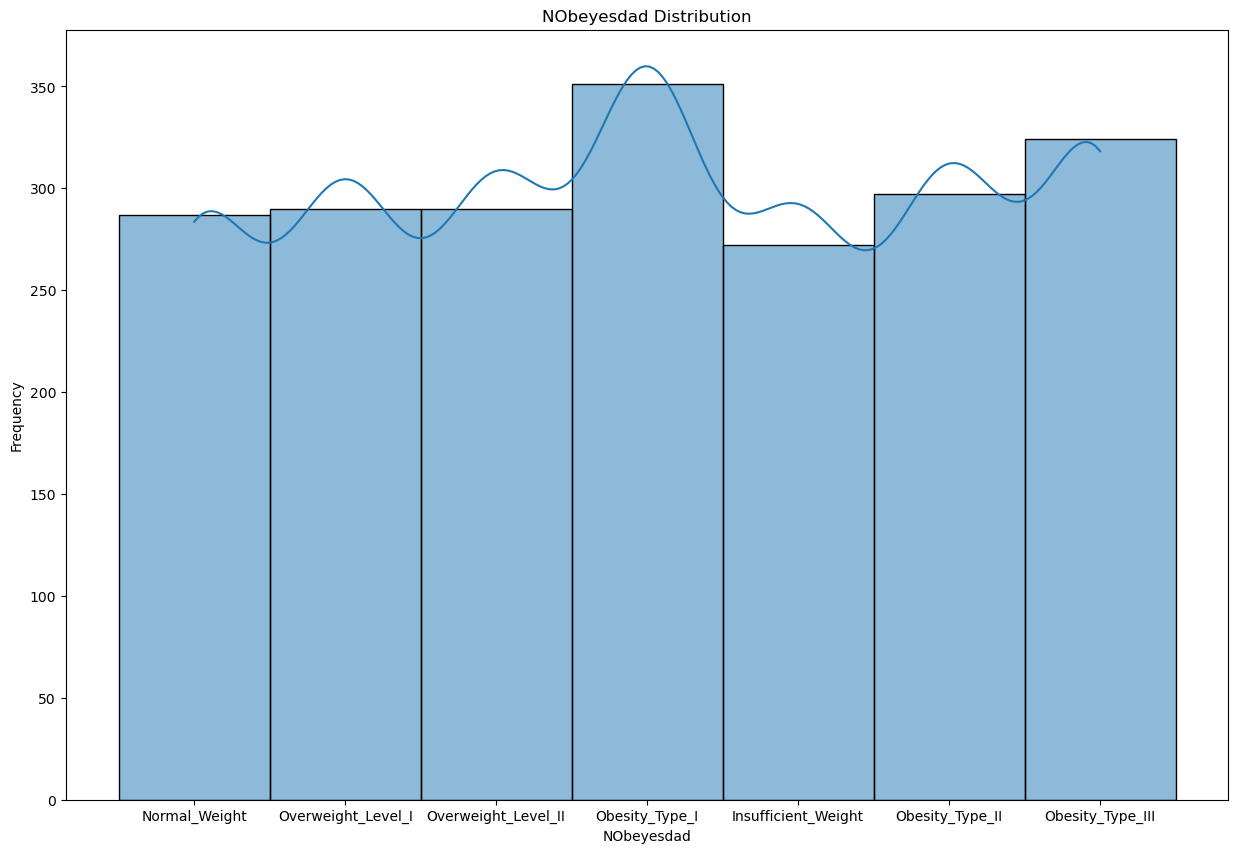

In [6]:
# data EDA

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of NObeyesdad (Use displot to analysis)
plt.figure(figsize=(15, 10))
sns.histplot(Obesitydata['NObeyesdad'], bins=20, kde=True)
plt.title('NObeyesdad Distribution')
plt.xlabel('NObeyesdad')
plt.ylabel('Frequency')
plt.show()

*This chart reveals the frequency distribution across different weight categories, where it can be observed that the frequencies do not differ significantly between the weight levels, providing insights for obesity prevention measures based on dietary and lifestyle data.*

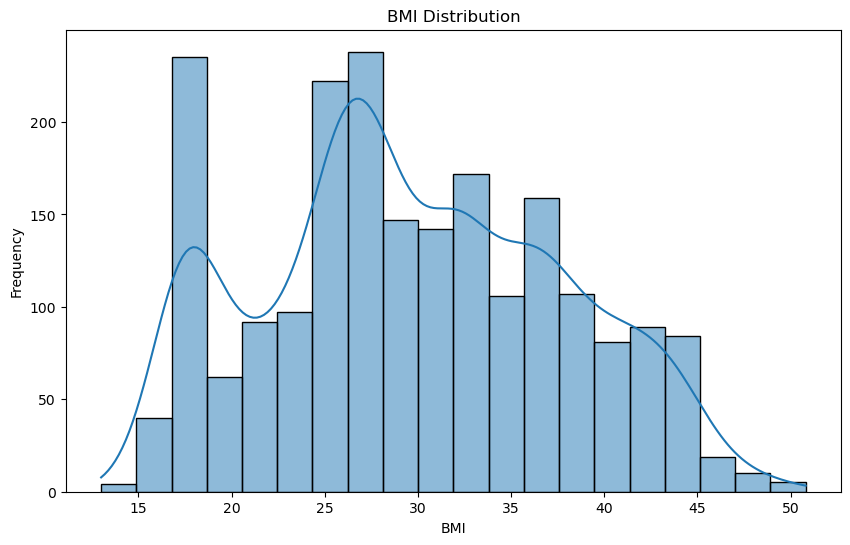

In [7]:
# Histogram of BMI (Use displot to analysis)
plt.figure(figsize=(10, 6))
sns.histplot(Obesitydata['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

*This histogram presents the frequency distribution of BMI, and its continuous probability density estimate line shows that most people are concentrated within the "Normal" and "Overweight" ranges, providing data support for designing targeted health intervention measures.*

#### According to the EDA results for the analysis of both NObeyesdad and BMI index, both charts show that while a large proportion of people fall into the "normal" weight category, obesity levels are not evenly distributed, with a positive tilt indicating a proportion of people fall into the highly obese category.

### 2.1 Identify data dependencies

In [8]:
numerical = [var_1 for var_1 in Obesitydata.columns if Obesitydata[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

categorical = [var for var in Obesitydata.columns if Obesitydata[var].dtype=='object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 numerical variables

The numerical variables are :

 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
There are 9 categorical variables

The categorical variables are :

 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


### Numerical data analysis

/Users/vickyzhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


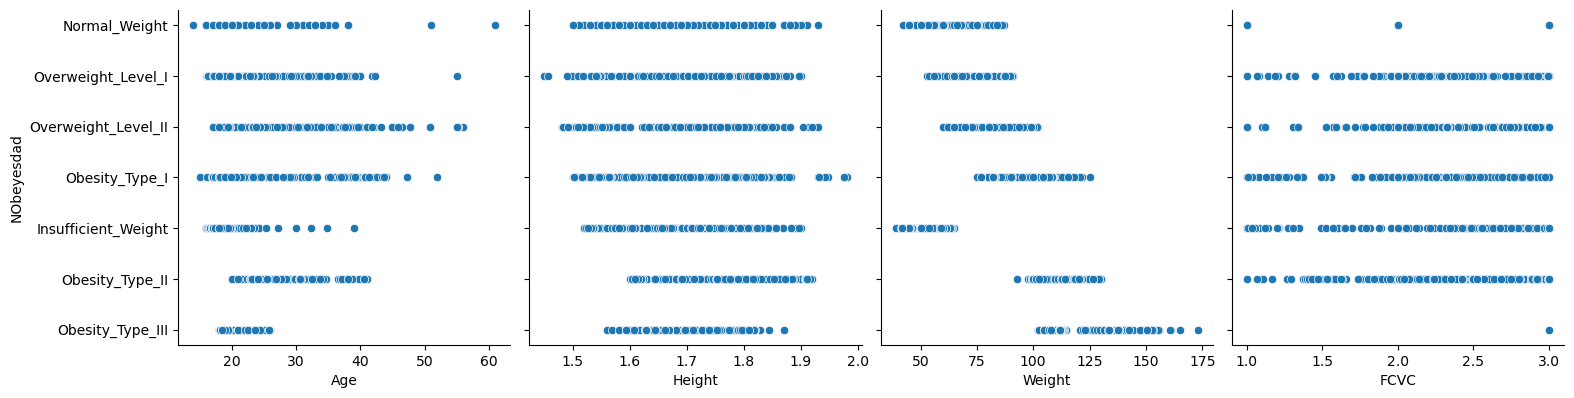

/Users/vickyzhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


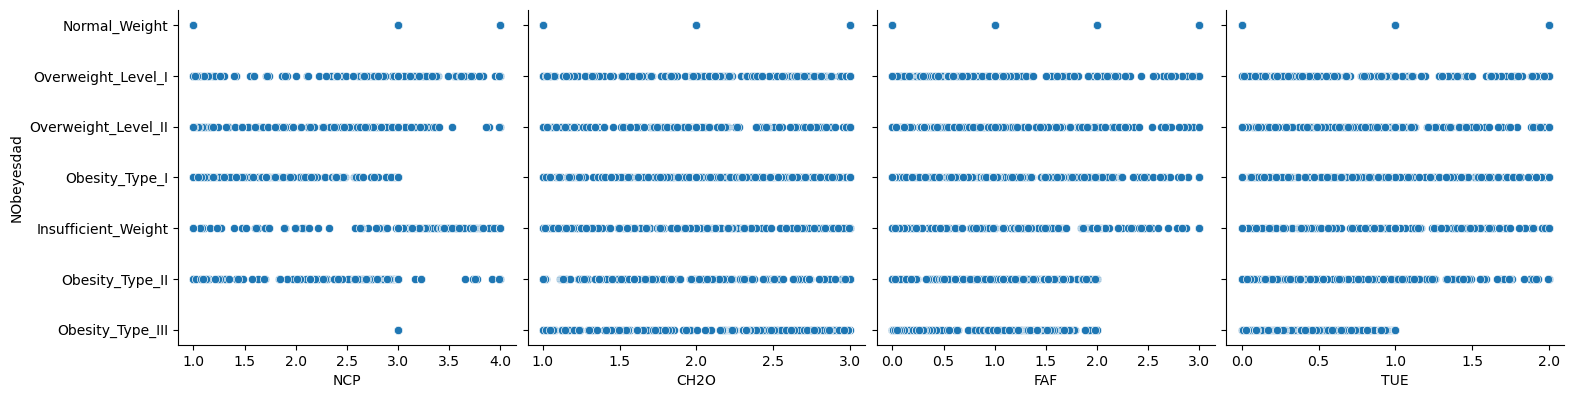

In [9]:
 # Using scatter plot to numeric variables with NObeyesdad
def pp(w,x,y,z):
    sns.pairplot(Obesitydata, x_vars=[w,x,y,z], y_vars='NObeyesdad',height=4, aspect=1, kind='scatter')
    plt.show()

pp('Age', 'Height', 'Weight', 'FCVC')
pp('NCP', 'CH2O', 'FAF', 'TUE')

*The scatter plot matrix above is used to display the relationships between weight categories and numerical variables such as age, height, weight, and frequency of vegetable consumption. It shows the distribution of different weight categories across these numerical variables which is not obvious, helping to understand how these variables are associated with weight status. (Specific observation results will follow in the Observation section below.)*

/Users/vickyzhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


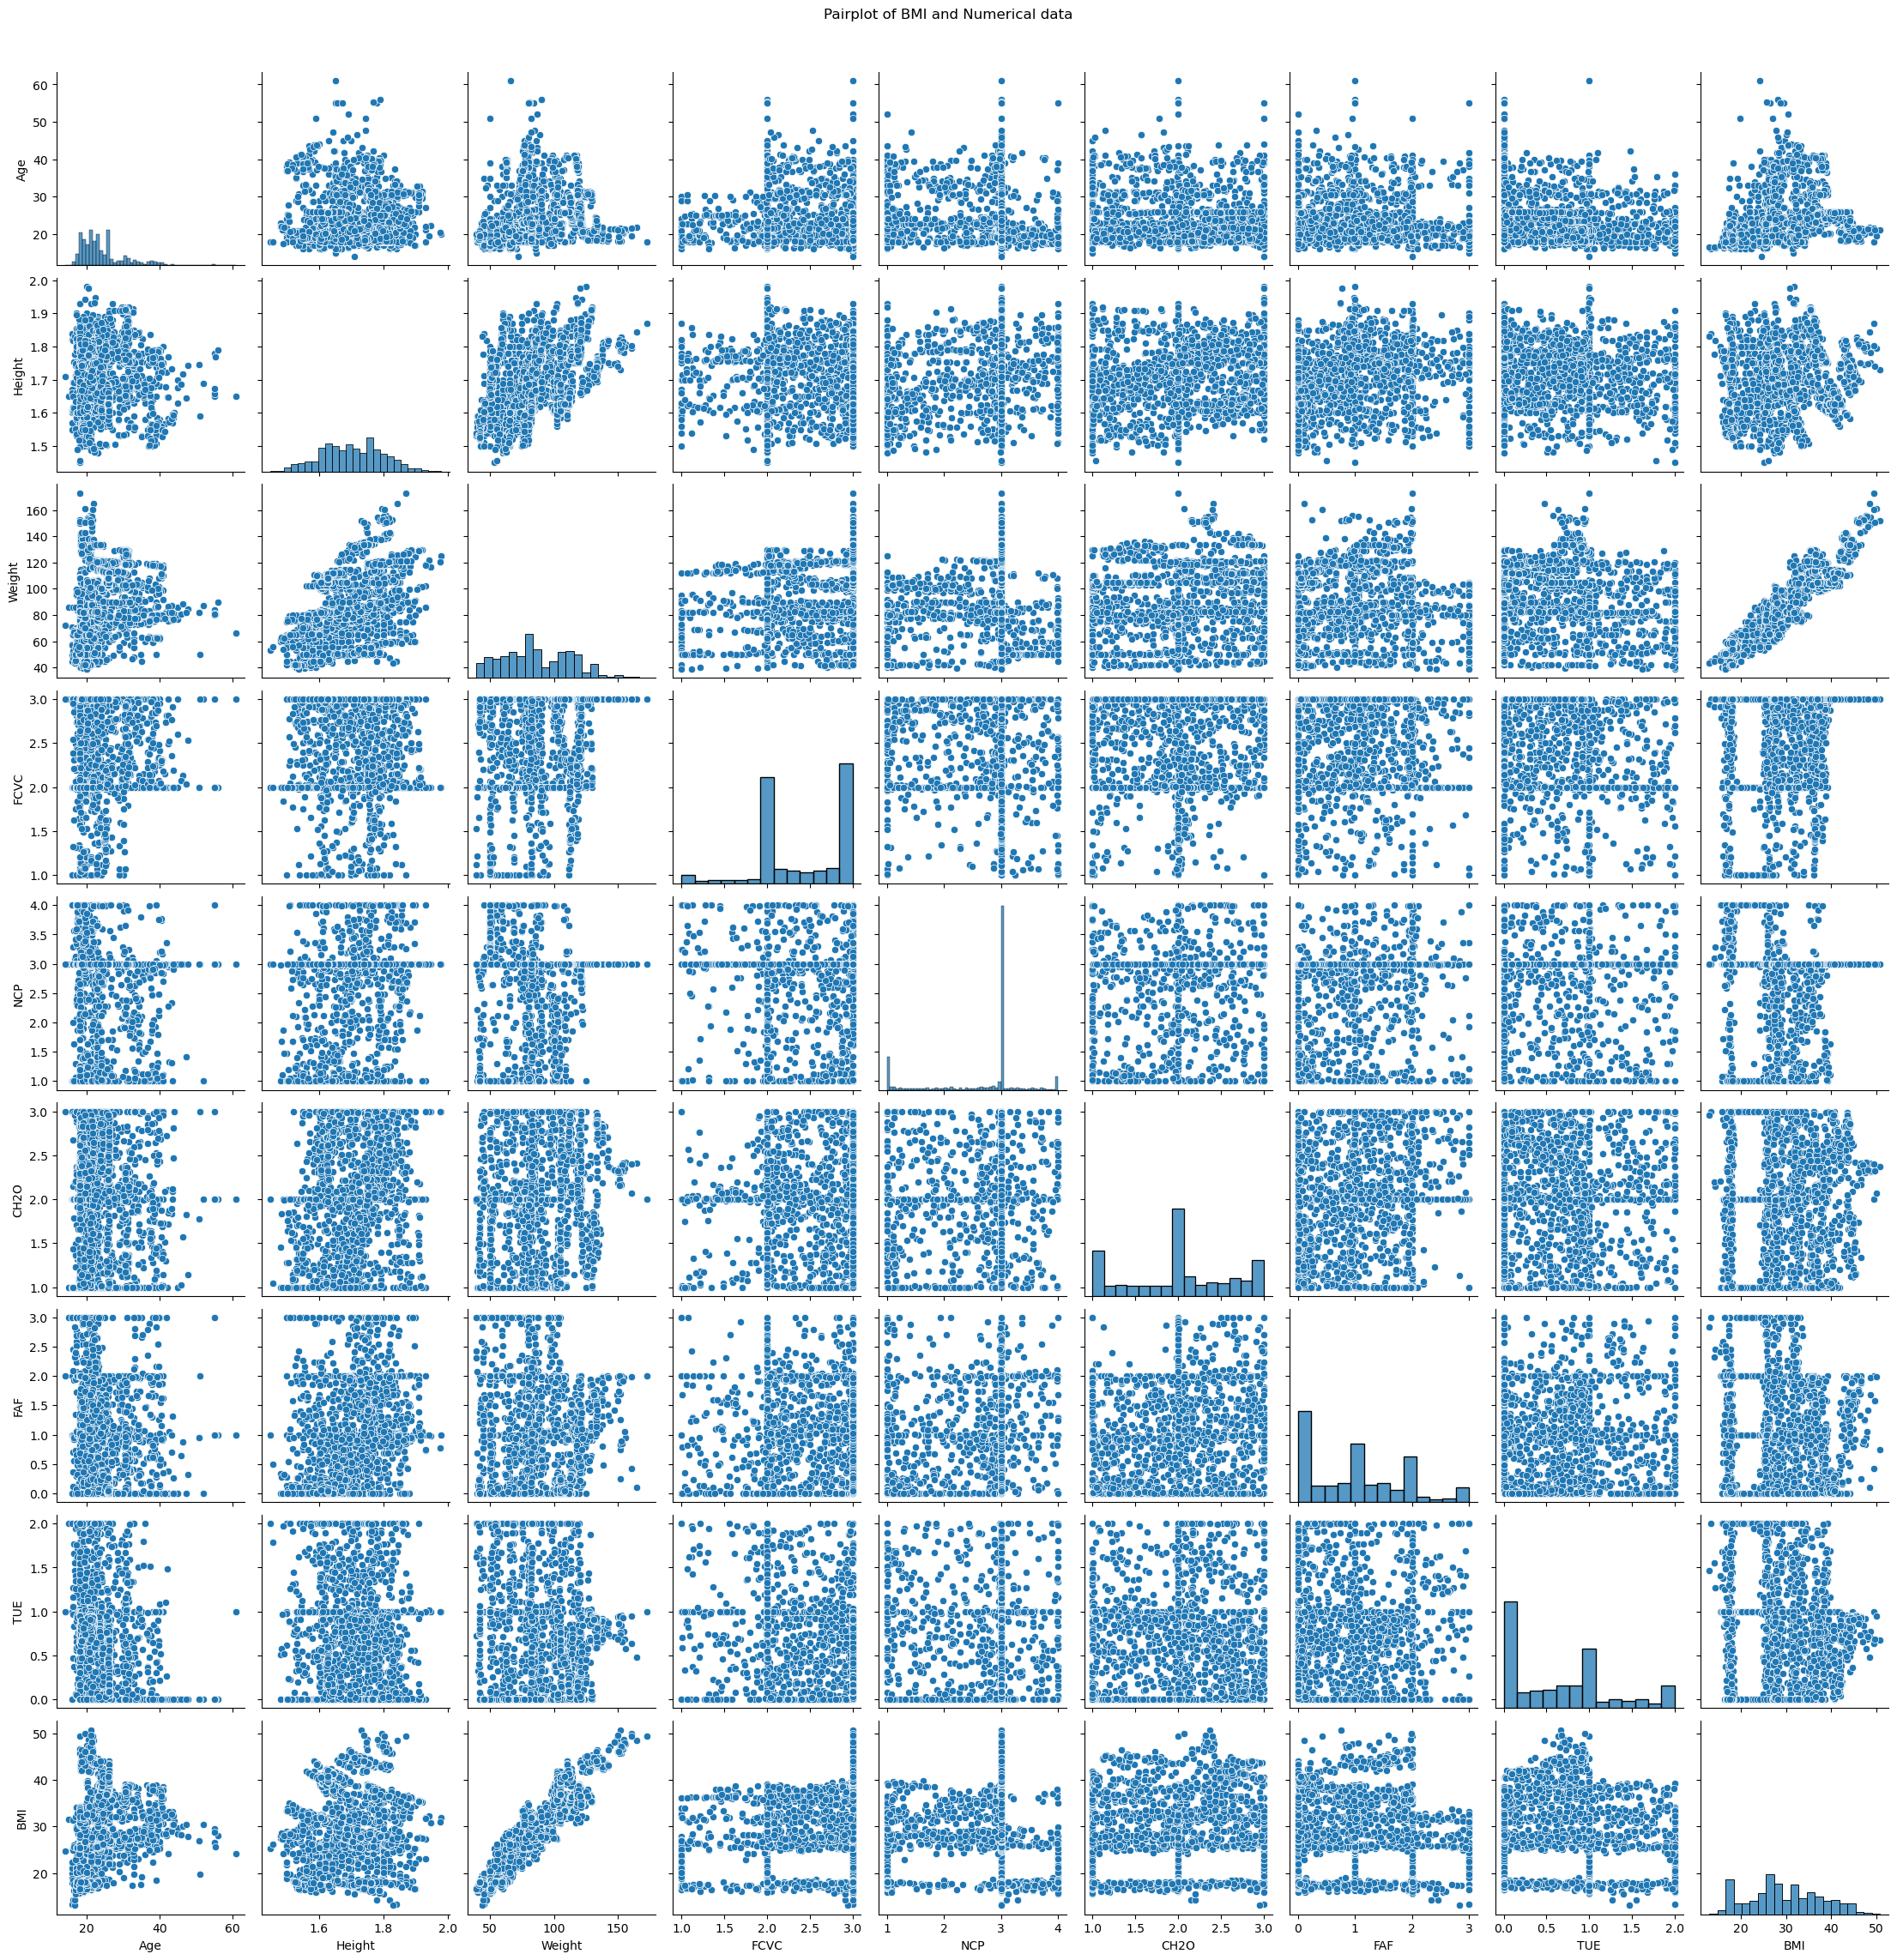

In [10]:
# Pairplot for BMI and Numerical data
sns.pairplot(Obesitydata[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']]) #输入想要分析的数据列表
plt.suptitle('Pairplot of BMI and Numerical data', y=1.02) #标题名称
plt.show()

*The scatter plot matrix above depicts the relationships between age, height, weight, vegetable consumption frequency and BMI, where weight and age exhibit relatively apparent positive correlations with BMI. Besides, the histograms on the diagonals provide the distribution of each individual variable, showing the range and concentration of values for each. It is useful for identifying trends, correlations, and potential areas for deeper investigation, especially when it comes to identifying factors that may influence BMI and, by extension, obesity. (Specific observation results will follow in the Observation section below.)*


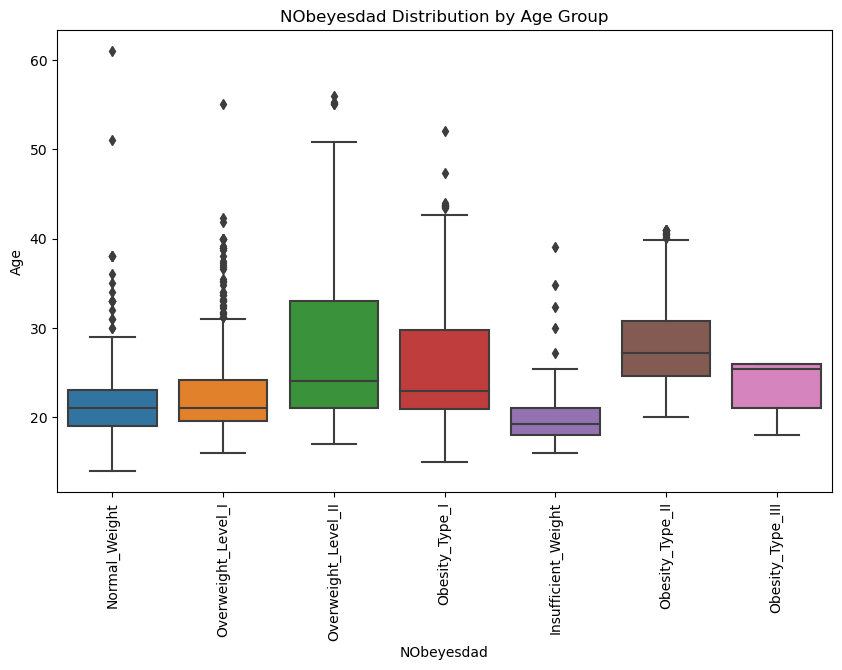

In [11]:
# Boxplot of NObeyesdad by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=Obesitydata)
plt.title('NObeyesdad Distribution by Age Group')
plt.xlabel('NObeyesdad')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

*The boxplot displays the age distribution of different obesity levels, sorted by "NObeyesdad". The majority of ages fall within the lower half of the range, while a significant number of outliers extend beyond this range. These outliers exhibit considerable variations in age, suggesting that they represent valid data points rather than errors and should not be disregarded. They can offer valuable insights into the characteristics and conditions of individuals across various ages and weights. (see details in observation below)*

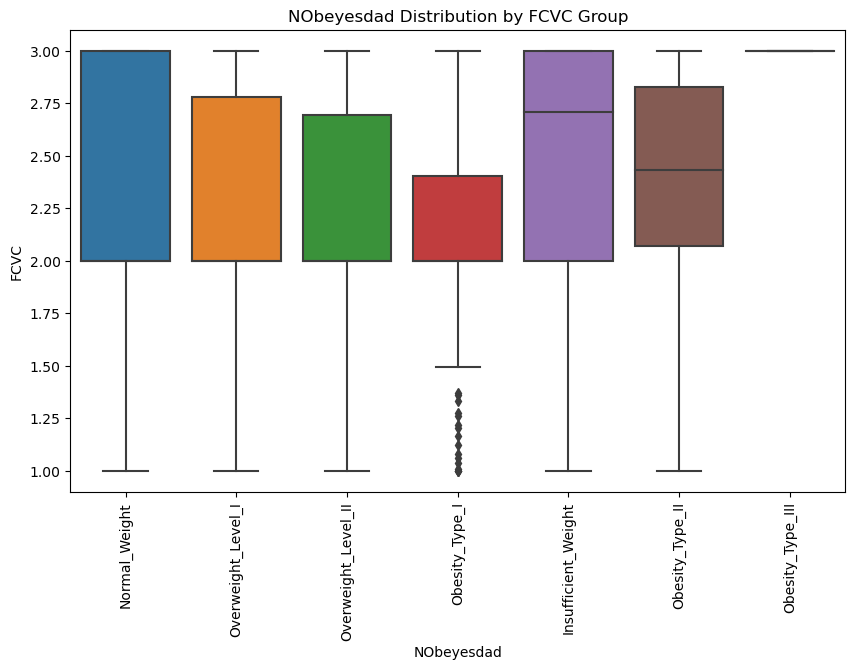

In [12]:
# Boxplot of NObeyesdad by NCP Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='FCVC', data=Obesitydata)
plt.title('NObeyesdad Distribution by FCVC Group')
plt.xlabel('NObeyesdad')
plt.ylabel('FCVC')
plt.xticks(rotation=90)
plt.show()

*The graph shows the distribution of FCVC values for different weight groups. The median FCVC value in all groups was close to 2.5, indicating that most people's FCVC values were similar. There are multiple outliers in the Overweight II group that are below the normal range for that group. This suggests that within this weight range, some individuals have significantly lower FCVC values than others. The presence of outliers suggests that there are some individuals whose FCVC values are significantly different from those of most people. (see details in observation below)*

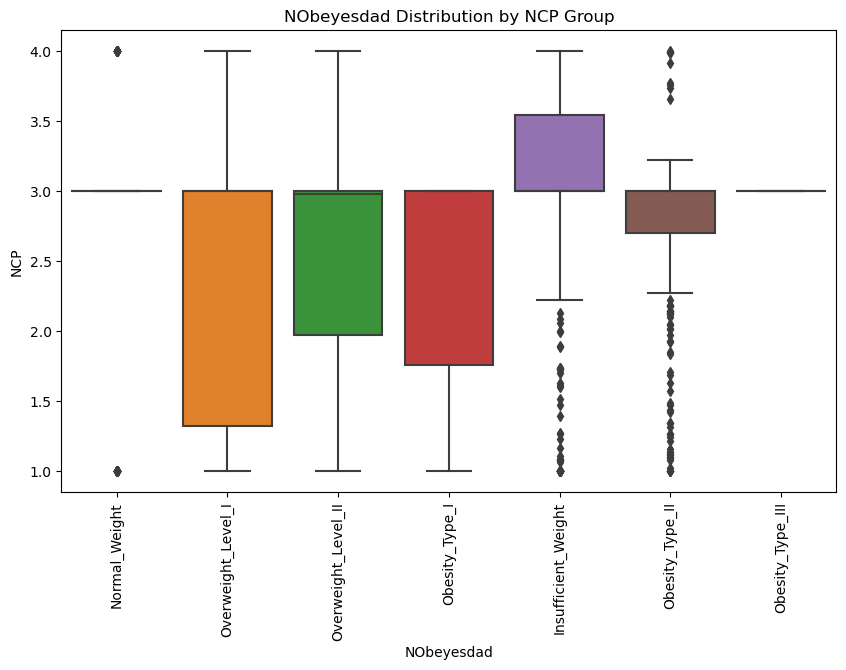

In [13]:
# Boxplot of NObeyesdad by FAF Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='NCP', data=Obesitydata)
plt.title('NObeyesdad Distribution by NCP Group')
plt.xlabel('NObeyesdad')
plt.ylabel('NCP')
plt.xticks(rotation=90)
plt.show()

*The box plot illustrates the distribution of the number of main meals (NCP) in different levels of obesity (NObeyesdad category). As can be seen from the figure, there are significant differences in nutrient consumption among different weight groups, and the variability of NCP is greater in obese individuals. In addition, the presence of more outliers in Insufficient_Weight should not be ignored or deleted because it may represent the particular eating habit or health condition of some individual. With further analysis, these data can reveal the complex relationship between nutrient consumption and weight categories. (see details in observation below)*

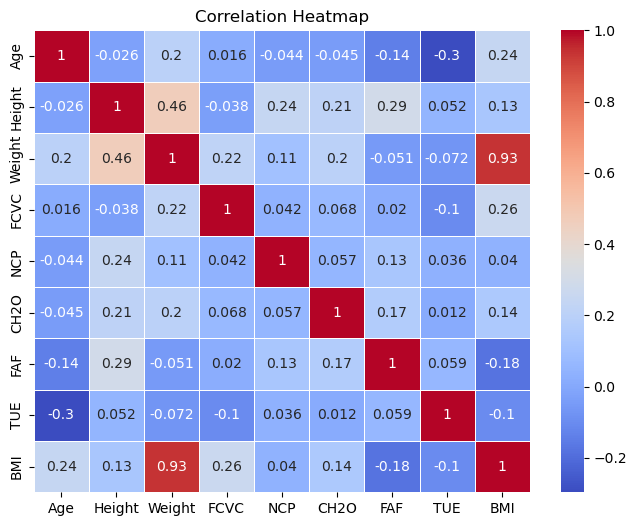

In [14]:
# Select a column of numeric type to convert the data in df to a number and delete non-numeric data
numeric_df = Obesitydata.select_dtypes(include=[np.number])

# Matrix data
correlation_matrix = numeric_df.corr()

# Draw heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

*This heat map shows the correlation between various variables, most of which are not strongly correlated, among which the correlation between age and fcvc is noteworthy compared with BMI, while the correlation between other variables is relatively weak, showing different degrees of positive and negative correlation. (see details in observation below)*

### Categorical data analysis

In [15]:
# Plot Chart to analysis categorial data

def plot_charts(var1,var2, label_rotation=False):

    plt.figure(figsize=(15, 10))

    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var1)
    plt1 = sns.countplot(data=Obesitydata, x=var1, palette="husl", hue=var1)
    plt1.set(xlabel = '%s'%var1, ylabel='Count of'+ '%s'%var1)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)

    plt.subplot(2,2,2)
    plt.title(var1+' vs BMI')
    plt2 = sns.boxplot(data=Obesitydata, x=var1, y="BMI", palette="husl", hue=var1)
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)

    plt.subplot(2,2,3)
    plt.title('Count Plot of '+ var2)
    plt3 = sns.countplot(data=Obesitydata, x=var2, palette="husl", hue=var2)
    plt3.set(xlabel = '%s'%var2, ylabel='Count of'+ '%s'%var2)
    if(label_rotation):
        plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)

    plt.subplot(2,2,4)
    plt.title(var2+' vs BMI')
    plt4 = sns.boxplot(data=Obesitydata, x=var2, y="BMI", palette="husl", hue=var2)
    if(label_rotation):
        plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)

    plt.show()

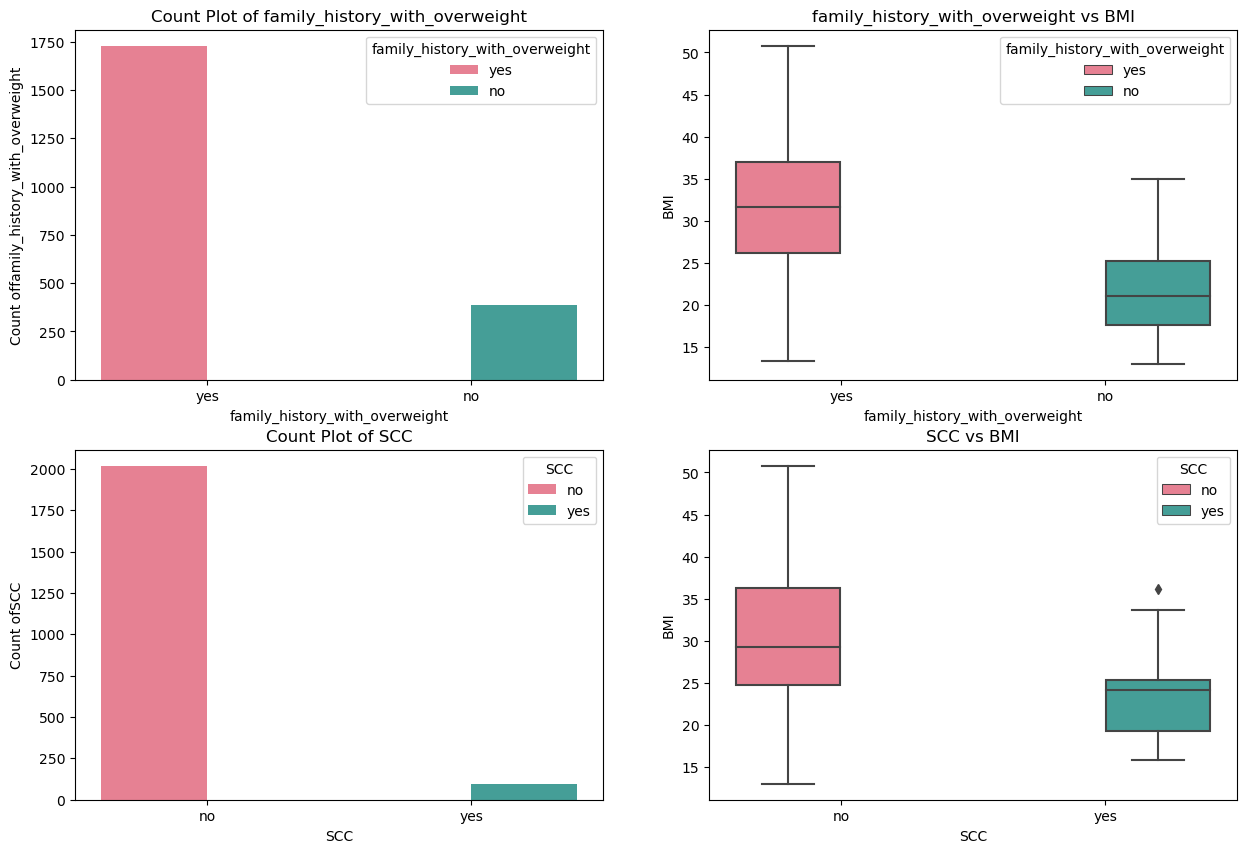

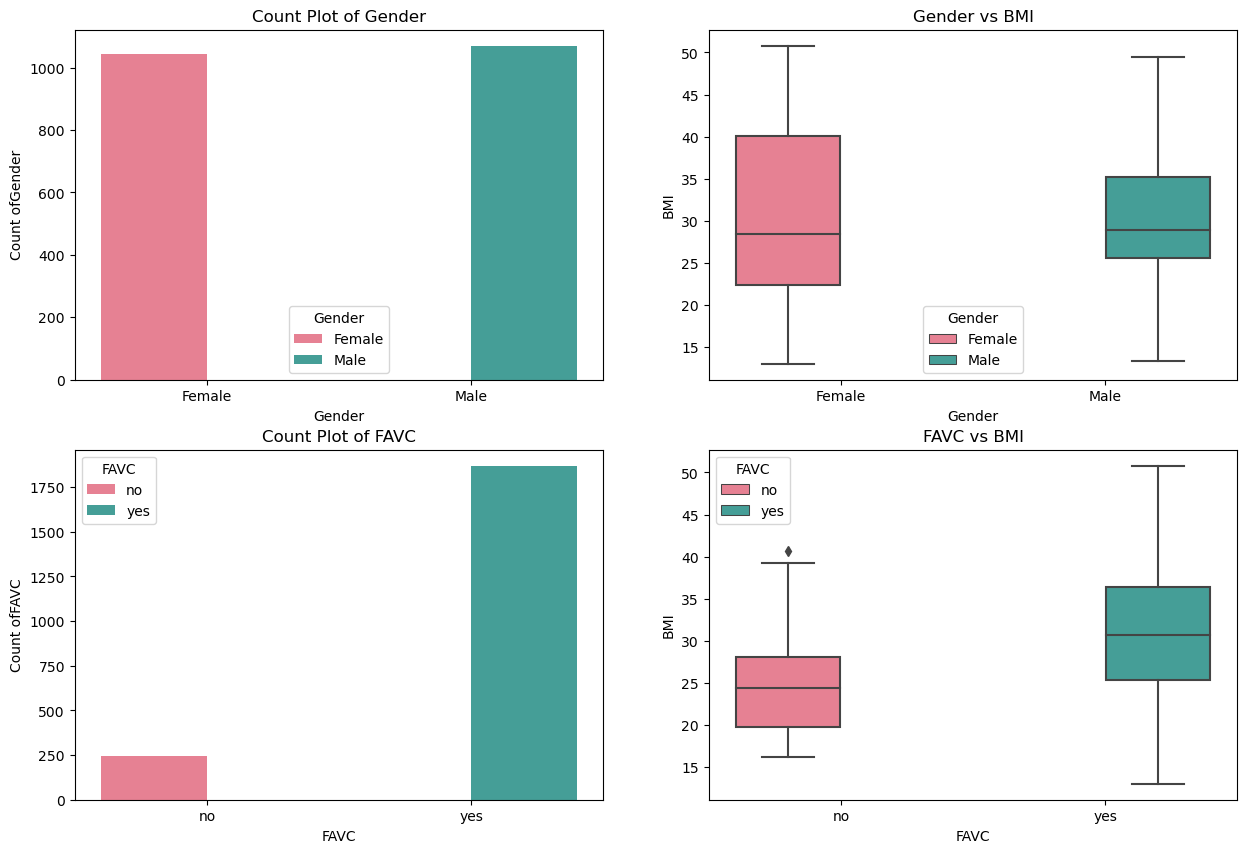

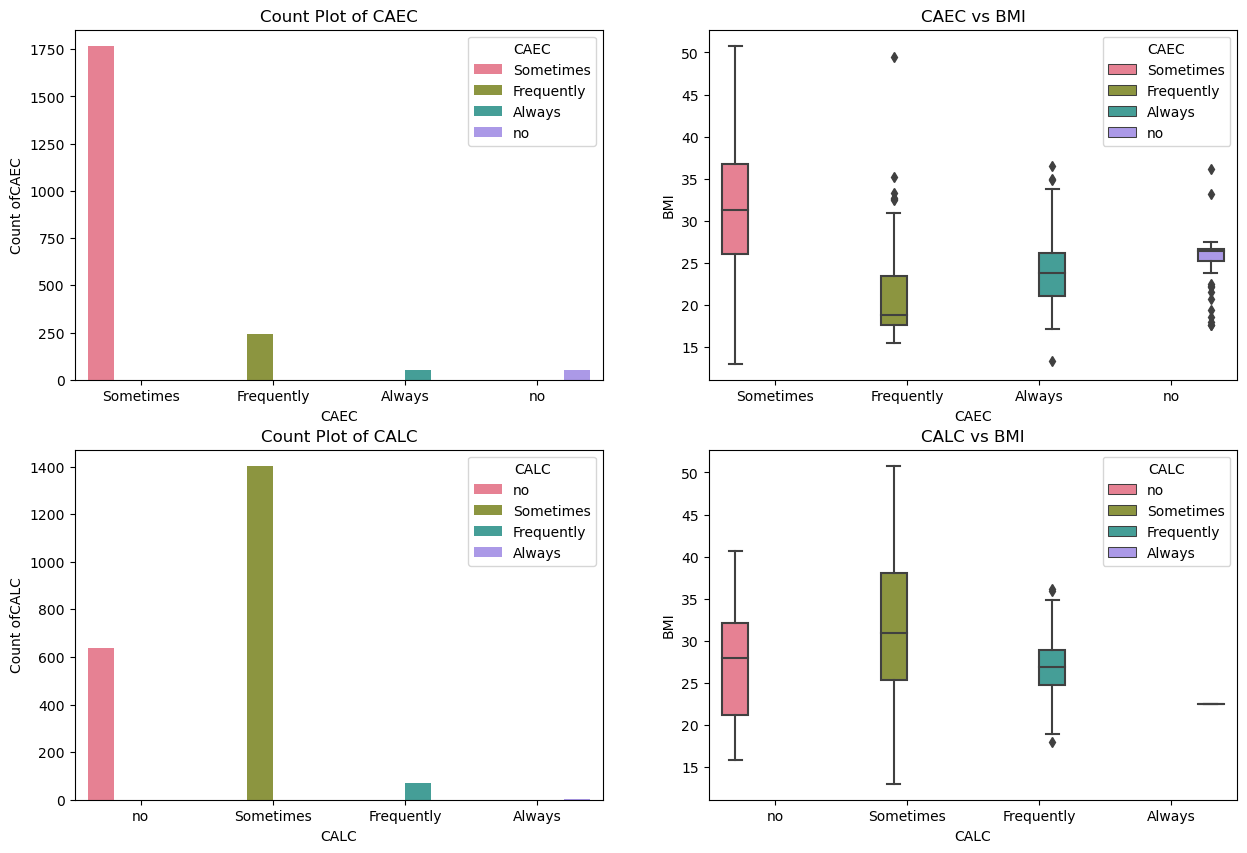

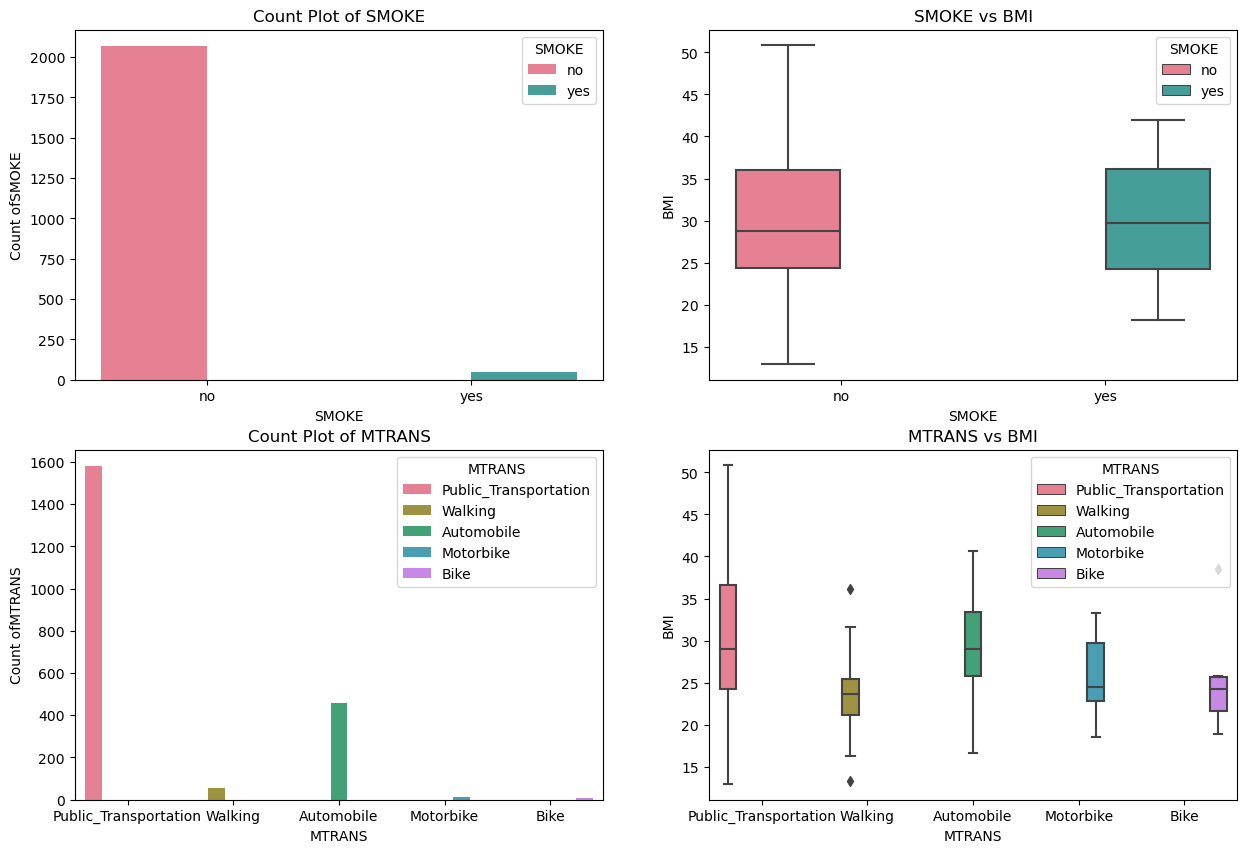

In [16]:
plot_charts('family_history_with_overweight', 'SCC')
plot_charts('Gender', 'FAVC')
plot_charts('CAEC', 'CALC')
plot_charts('SMOKE', 'MTRANS')

*We can get an idea of which categories are more common from the count plot, and the central trend, spread and possible outliers of the BMI distribution in different categories can be seen from the box plot. The graph above can help us to determine the possible relationship between different behaviors, habits or characteristics and BMI. It helps to understand how to improve or maintain a healthy weight. (see details in observation below)*

### Observation:
1. **Weight** shows strongly correlates with NObeyesdad and BMI, with height positively associated;
2. **FAF** and **TUE** shows **negative correlates** with BMI;
3. **Age** shows a relationship with obesity - older individuals tend toward moderate obesity, while youngers have a wider distribution. As obesity increases, the median age rises, especially in Obesity Type III, suggesting cumulative effects or age-related factors contributing to higher obesity.
4. High-calorie food **(FAVC)** decreases at severe obesity levels, possibly reflecting attempts to control intake.
5. **NCP** fluctuates more in higher obesity categories, with irregular eating patterns. Individuals with Obesity Type II/III rarely exercise more than twice.
6. In terms of **gender**, women exhibited a slightly higher median BMI compared to men.  
7. **(FAF)** Cyclists demonstrated a lower median BMI, indicating the advantageous effects of active transportation on weight management.
8. Individuals with a **family history of obesity**, frequent alcohol consumption, and lack of calorie monitoring all displayed higher median BMIs.
9. Those who consistently avoided high-calorie foods and regularly consumed vegetables **(FCVC)** exhibited lower BMIs.
10. There was no significant correlation observed between **smoking** status and BMI.

## 3. Organise the data for modelling

### Label Encoding

In [17]:
#Encoding data for Lgistics regression

from sklearn.preprocessing import LabelEncoder

def label_encoder(a):
    le = LabelEncoder()
    return le.fit_transform(a)

Obesitydata.columns

label_list = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for i in label_list:
    Obesitydata[i] = label_encoder(Obesitydata[i])

Obesitydata.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  \
0  3.0     2      0   2.0    0  0.0  1.0     3       3        Normal_Weight   
1  3.0     2      1   3.0    1  3.0  0.0     2       3        Normal_Weight   
2  3.0     2      0   2.0    0  2.0  1.0     1       3        Normal_Weight   
3  3.0     2      0   2.0    0  2.0  0.0     1       4   Overweight_Level_I   
4  1.0     2      0   2.0    0  0.0  0.0     2       3  Overweight_Level_II   

         BMI  
0  24.386526  
1  24.238227  
2  23.765432  
3  26.851852  
4  28.342381

*Label Encoding is to convert categorical data into numerical data so that the algorithm can better understand and process the data*

### Normalizing the variables

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Obesitydata.head()

scaler.fit(Obesitydata.drop(['NObeyesdad', 'BMI'],axis=1))
scaled_features = scaler.transform(Obesitydata.drop(['NObeyesdad', 'BMI'],axis=1))

Obesitydata.columns

columns=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O','Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


Obesitydata_scaled = pd.DataFrame(scaled_features,columns=columns)
Obesitydata_scaled.head()

Age    Height    Weight      FCVC       NCP      CH2O    Gender  \
0 -1.011914 -0.522124 -0.875589 -0.862558  0.472291 -2.759769 -0.785019   
1 -1.011914 -0.522124 -1.947599 -1.168077  0.472291 -2.759769  1.088342   
2  0.988227 -0.206889  1.054029 -0.366090  0.472291 -2.759769 -0.785019   
3  0.988227  0.423582  1.054029  0.015808 -2.117337 -2.759769  1.088342   
4  0.988227 -0.364507  0.839627  0.122740 -2.117337 -2.759769 -0.785019   

   family_history_with_overweight      FAVC      CAEC     SMOKE       SCC  \
0                        0.404153  0.300346 -0.145900 -0.013073 -0.218272   
1                        0.404153  0.300346  6.853997  1.618759  4.581439   
2                        0.404153  0.300346 -0.145900 -0.013073 -0.218272   
3                        0.404153  0.300346 -0.145900 -0.013073 -0.218272   
4                       -2.167023  0.300346 -0.145900 -0.013073 -0.218272   

        FAF       TUE      CALC    MTRANS  
0 -1.188039  0.561997  1.419172  0.503337  
1  2.339750 -1.080625 -0.521160  0.503337  
2  1.163820  0.561997 -2.461491  0.503337  
3  1.163820 -1.080625 -2.461491  1.296280  
4 -1.188039 -1.080625 -0.521160  0.503337

*The figure shows the feature standardization process of the data set using 'StandardScaler'. The transformed data has a mean of 0 for each feature anda standard deviation of 1. Compared with 'MinMaxScaler', 'StandardScaler' is not sensitive to outliers and is more suitable for this case.*

### Handling inbalanced dataset

In this case, based on the chart about the distribution of NObeyesdad, the dataset is balance. We do not need to handling the dataset.

## 4. Implement prediction models

To evaluate a prediction model is to divide the data set into a training set and a test set, and here I use a random 70/30 segmentation method. This method uses complex and large data sets, has strong data generalization and helps detect and avoid overfitting risks. It allows the model to learn from the training data and then evaluate the previously unseen test data to estimate its performance on new data.

Since there are two types of indicators to be analyzed (NObeyesdad and BMI), the following are divided into different training sets and data sets according to different indicators.

### Train and Test set for NObeyesdad measures (for classification model)

In [19]:
from sklearn.model_selection import train_test_split

X1 = Obesitydata_scaled
y1 = Obesitydata['NObeyesdad']

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=45)

print("X1_train shape:",x1_train.shape)
print("X1_test shape:",x1_test.shape)
print("y1_train shape:",y1_train.shape)
print("y1_test shape:",y1_test.shape)

# To store results of models
result_dict_train_forLogisticModel = {}
result_dict_test_forLogisticModel = {}

X1_train shape: (1477, 16)
X1_test shape: (634, 16)
y1_train shape: (1477,)
y1_test shape: (634,)


### Train and Test set for BMI measures (for regression model)

In [20]:
from sklearn.model_selection import train_test_split

X2 = Obesitydata_scaled
y2 = Obesitydata['BMI']

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=45)

print("X2_train shape:",x2_train.shape)
print("X2_test shape:",x2_test.shape)
print("y2_train shape:",y2_train.shape)
print("y2_test shape:",y2_test.shape)

# To store results of models
result_dict_train_forLinearModel = {}
result_dict_test_forLinearModel = {}

X2_train shape: (1477, 16)
X2_test shape: (634, 16)
y2_train shape: (1477,)
y2_test shape: (634,)


## 5. Train prediction models

### Classification Models (predict NObeyesdad )

### Logistic Regression Model: train score

I choose to use Logistic regression model to predict the **NObeyesdad** index, because Logistic regression is mainly used to deal with binary classification problems and is suitable for predicting the probability of occurrence. In addition, Logistic regression models are trained and predicted faster and can quickly provide good baseline performance.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lgr_model = LogisticRegression(max_iter=5000)
accuracies_L = cross_val_score(lgr_model, x1_train, y1_train, cv=5)
lgr_model.fit(x1_train, y1_train)

print("Logistic Regression Model Train Score:",np.mean(accuracies_L))

Logistic_trainscore = np.mean(accuracies_L)

result_dict_train_forLogisticModel["Logistic Regression Model Default Train Score"] = Logistic_trainscore

print(result_dict_train_forLogisticModel)

Logistic Regression Model Train Score: 0.8632844709115896
{'Logistic Regression Model Default Train Score': 0.8632844709115896}


### SVC Model: train score

I choose SVC as an external comparision between modles which is a powerful classification model capable of handling complex data sets and nonlinear relationships. It performs well in handling classification problems and has a good ability to generalize in a variety of situations. Since **NObeyesdad** is a categorical variable, SVC can effectively predict it.

In [22]:

from sklearn.svm import SVC
svc_model = SVC(random_state = 101)
accuracies_svc = cross_val_score(svc_model, x1_train, y1_train, cv=5)
svc_model.fit(x1_train,y1_train)

print("SVC Model Train Score:",np.mean(accuracies_svc))

svc_transcore = np.mean(accuracies_svc)
result_dict_train_forSVCModel = {}
result_dict_train_forSVCModel["SVC Model Default Train Score"] = svc_transcore
print(result_dict_train_forSVCModel)

SVC Model Train Score: 0.8598763169949611
{'SVC Model Default Train Score': 0.8598763169949611}


### Multi-Layer Perceptron model: train score

I chose to employ the Multi-Layer Perceptron (MLP) model because a significant portion of this dataset consists of a mix of multiclass classification data and numerical data. Also, the previous heatmap analysis revealed that most data does not exhibit strong linear relationships. Therefore, when dealing with complex non-linear relationships, the MLP model becomes a strong and ideal choice to predict both **NObeyesdad and BMI**.

In [23]:
!{sys.executable} -m pip install --force-reinstall tensorflow

zsh:1: parse error near `-m'


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

# define the class nums
num_classes = 7  

# encoding str
label_encoder = LabelEncoder()

# encoding test/train data
y1_train_encoded = label_encoder.fit_transform(y1_train)
y1_test_encoded = label_encoder.transform(y1_test)

# define real class
num_classes = max(y1_train_encoded.max(), y1_test_encoded.max()) + 1

y1_train_categorical = to_categorical(y1_train_encoded, num_classes)
y1_test_categorical = to_categorical(y1_test_encoded, num_classes)

# x1_train, y1_train are defined for the classification task

# Create the MLP model for classification
model_classification = Sequential()
model_classification.add(Dense(32, input_dim=x1_train.shape[1]))  
model_classification.add(Activation('relu'))
model_classification.add(Dense(64))
model_classification.add(Activation('relu'))
model_classification.add(Dense(128))
model_classification.add(Activation('relu'))
model_classification.add(Dense(256))
model_classification.add(Activation('relu'))
model_classification.add(Dense(num_classes)) 
model_classification.add(Activation('softmax'))

model_classification.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classification model
history_classification = model_classification.fit(x1_train, y1_train_categorical, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


/Users/vickyzhang/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3630 - loss: 1.7499 - val_accuracy: 0.5709 - val_loss: 1.0614
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6034 - loss: 0.9803 - val_accuracy: 0.6791 - val_loss: 0.7719
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7613 - loss: 0.6426 - val_accuracy: 0.7939 - val_loss: 0.5837
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8285 - loss: 0.4556 - val_accuracy: 0.8176 - val_loss: 0.5250
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3790 - val_accuracy: 0.8176 - val_loss: 0.4753
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8951 - loss: 0.3184 - val_accuracy: 0.8378 - val_loss: 0.4288
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9387 - loss: 0.2107 - val_accuracy: 0.8514 - val_loss: 0.4244
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9191 - loss: 0.2091 - val_accuracy: 0.8851 - val_loss: 0.3

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.0930e-04 - val_accuracy: 0.8784 - val_loss: 0.5988
Epoch 52/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.9193e-04 - val_accuracy: 0.8784 - val_loss: 0.6038
Epoch 53/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 6.7886e-04 - val_accuracy: 0.8784 - val_loss: 0.6032
Epoch 54/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7906e-04 - val_accuracy: 0.8784 - val_loss: 0.6132
Epoch 55/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5105e-04 - val_accuracy: 0.8784 - val_loss: 0.6022
Epoch 56/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.5698e-04 - val_accuracy: 0.8784 - val_loss: 0.6177
Epoch 57/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.8403e-04 - val_accuracy: 0.8784 - val_loss: 0.6164
Epoch 58/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.3860e-04

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.0403e-04 - val_accuracy: 0.8784 - val_loss: 0.7077


In [25]:
# Calculate the accuracy for the training set
MLP_Classif_train_accuracy = np.mean(history_classification.history['accuracy'])
print("MLP Classification Model Train Accuracy to predict NObeyesdad:", MLP_Classif_train_accuracy)

MLP Classification Model Train Accuracy to predict NObeyesdad: 0.9814987292885781


### Regression Models (predict BMI)

### Linear Regression Model: train score

I choose to use linear regression to analyze **BMI** continuous variable data, because linear regression is particularly suitable for predicting continuous outcomes. Unlike logistic regression which is primarily used for binary classification, linear regression allows us to directly estimate the BMI value rather than predicting probabilities of occurrence. Additionally, linear regression models are computationally efficient, providing faster training and prediction times compared to more complex models. This enables us to quickly establish a solid baseline performance for BMI analysis.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # For scaling the features
import matplotlib.pyplot as plt

# Fitting Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x2_train, y2_train)

# Calculate the training score
Linear_train_score = linear_model.score(x2_train, y2_train)

print(f"Linear regression Training score: {Linear_train_score}")

result_dict_train_forLinearModel["Linear regression Default Train Score"] = Linear_train_score
print(result_dict_train_forLinearModel)

Linear regression Training score: 0.9908653672796904
{'Linear regression Default Train Score': 0.9908653672796904}


### Multi-Layer Perceptron model (explain the reason above): train score

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

# x2_train, y2_train are defined for the regression task

# Create the MLP model for regression
model_regression = Sequential()
model_regression.add(Dense(32, input_dim=x2_train.shape[1]))  
model_regression.add(Activation('relu'))
model_regression.add(Dense(64))
model_regression.add(Activation('relu'))
model_regression.add(Dense(128))
model_regression.add(Activation('relu'))
model_regression.add(Dense(256))
model_regression.add(Activation('relu'))
model_regression.add(Dense(1))  

model_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the regression model
history_regression = model_regression.fit(x2_train, y2_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


/Users/vickyzhang/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 819.4728 - mae: 26.9552 - val_loss: 210.1753 - val_mae: 10.2261
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.4451 - mae: 7.1852 - val_loss: 28.4352 - val_mae: 4.2197
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.1742 - mae: 4.1195 - val_loss: 17.2810 - val_mae: 3.2633
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.3730 - mae: 3.2395 - val_loss: 12.9924 - val_mae: 2.7446
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.5488 - mae: 2.6962 - val_loss: 10.1080 - val_mae: 2.3634
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0788 - mae: 2.2806 - val_loss: 8.3841 - val_mae: 2.1060
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8856 - mae: 2.0094 - val_loss: 7.4122 - val_mae: 1.9747
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1160 - mae: 1.9260 - val_loss: 6.7008 - val_mae: 1.7763
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.

Epoch 55/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1907 - mae: 0.3341 - val_loss: 2.1017 - val_mae: 0.8212
Epoch 56/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2065 - mae: 0.3397 - val_loss: 2.0177 - val_mae: 0.8239
Epoch 57/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1934 - mae: 0.3399 - val_loss: 2.0279 - val_mae: 0.8164
Epoch 58/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1758 - mae: 0.3195 - val_loss: 2.0815 - val_mae: 0.8253
Epoch 59/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1817 - mae: 0.3282 - val_loss: 2.0138 - val_mae: 0.7950
Epoch 60/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1602 - mae: 0.3110 - val_loss: 2.0454 - val_mae: 0.8368
Epoch 61/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1621 - mae: 0.3159 - val_loss: 1.9948 - val_mae: 0.8083
Epoch 62/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1679 - mae: 0.3165 - val_loss: 2.0268 - val_mae: 0.8111
Epoch 63/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [28]:
# Calculate the mean absolute error for the training set
MLP_Regress_train_mae = np.mean(history_regression.history['mae'])
print("MLP Regression Model Train to predict BMI:", MLP_Regress_train_mae)

MLP Regression Model Train to predict BMI: 0.8880745664238929


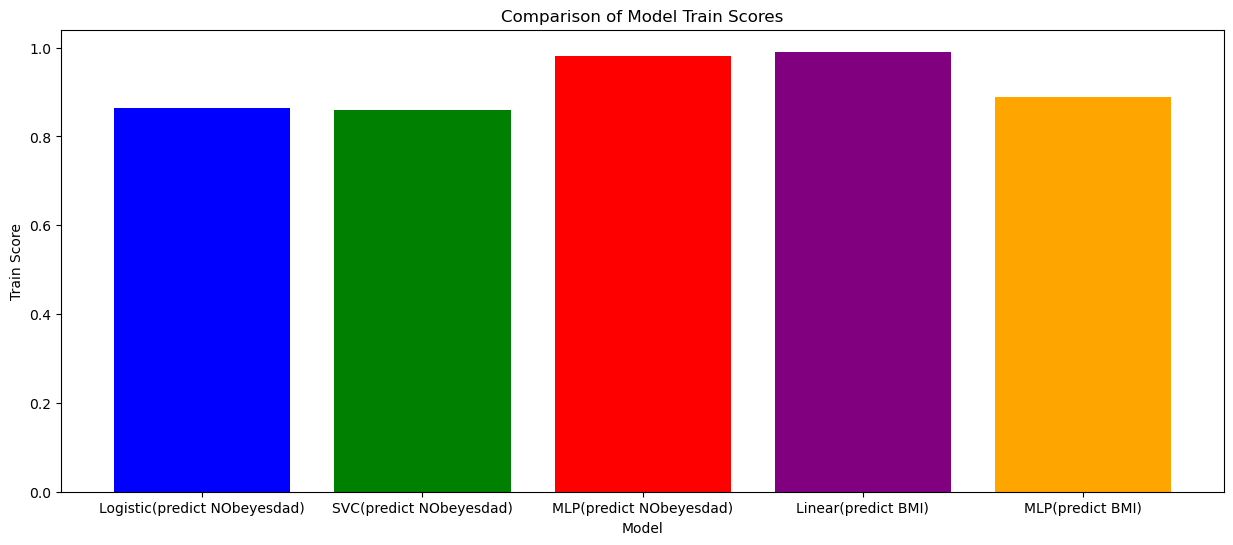

In [29]:
# Train Score Prediction Conclusion

import matplotlib.pyplot as plt

models = ['Logistic(predict NObeyesdad)', 'SVC(predict NObeyesdad)', 'MLP(predict NObeyesdad)', 'Linear(predict BMI)', 'MLP(predict BMI)']
train_scores = [Logistic_trainscore, svc_transcore, MLP_Classif_train_accuracy, Linear_train_score, MLP_Regress_train_mae]

plt.figure(figsize=(15, 6))
plt.bar(models, train_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Train Score')
plt.title('Comparison of Model Train Scores')
plt.show()

*The multi-layer perceptron (MLP) performed best in predicting classification problems (NObeyesdad) with an accuracy of 0.98. In regression problems predicting continuous variables (BMI values), linear regression significantly outperforms MLP with a near-perfect score of 0.99.*

## 6. Test prediction models and show results

For this case, I have separated the models into two types to handle different dataset problems: multiclass classification and continuous data regression. For classification problems, I employed Logistic Regression, Support Vector Machines (SVC), and Multi-Layer Perceptron (MLP) with activation functions. Conversely, for regression problems, I utilized Linear Regression and MLP models.

### Classification Models (predict NObeyesdad)

### *Logistic Regression Model: test score and evaluation*

In [30]:
print("Logistic Model Test Score to predict NObeyesdad:",lgr_model.score(x1_test,y1_test))
result_dict_test_forLogisticModel["Logistic regression Default Test Score"] = lgr_model.score(x1_test,y1_test)
print(result_dict_test_forLogisticModel)

Logistic Model Test Score to predict NObeyesdad: 0.8722397476340694
{'Logistic regression Default Test Score': 0.8722397476340694}


In [31]:
# Making predictions
y1_pred = lgr_model.predict(x1_test)

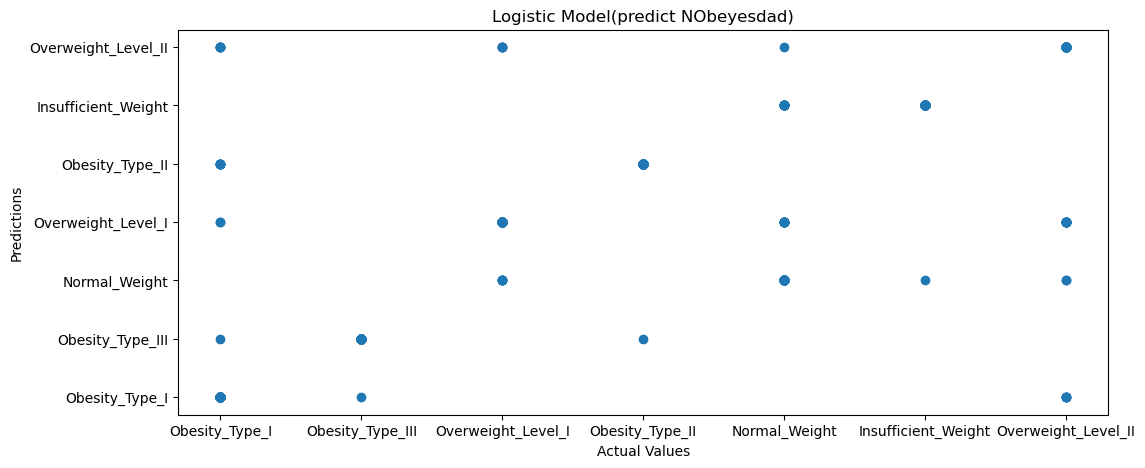

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# convert the predictions to a pandas dataframe
predictions_pd1 = pd.DataFrame({
    'Actual Values': y1_test,
    'Predictions': y1_pred
})

# Set the size of the figure
plt.figure(figsize=(12, 5))

# Plot the predictions versus the actual values
plt.scatter(predictions_pd1['Actual Values'], predictions_pd1['Predictions'])
plt.title('Logistic Model(predict NObeyesdad)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

*The chart shows the logistic model's predictions versus actual values, with points on the diagonal indicating perfect matches. While predictions align closely for 'Insufficient_Weight', confusion is evident between categories like 'Overweight_Level_I', highlighting discrepancies in predictions.*

#### Logistic model performance evaluation

For a logical model, because it is often used to classify tasks, Accuracy, F1 Score, Precision, and Recall are appropriate metrics to evaluate. 

In [34]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y1_test is your test labels and prediction1 is the predictions made by your model

# Calculate F1 score
Lgr_f1 = f1_score(y1_test, y1_pred, average='weighted')
print("Lgr_F1 Score:", Lgr_f1)

# Calculate Accuracy
Lgr_accuracy = accuracy_score(y1_test, y1_pred)
print("Lgr_Accuracy:", Lgr_accuracy)

# Calculate Precision
Lgr_precision = precision_score(y1_test, y1_pred, average='weighted')
print("Lgr_Precision:", Lgr_precision)

# Calculate Recall
Lgr_recall = recall_score(y1_test, y1_pred, average='weighted')
print("Lgr_Recall:", Lgr_recall)

Lgr_F1 Score: 0.8705288858415957
Lgr_Accuracy: 0.8722397476340694
Lgr_Precision: 0.8800650837191658
Lgr_Recall: 0.8722397476340694


In [35]:
from sklearn.metrics import classification_report

# create evaluate report
Lgr_actual = predictions_pd1['Actual Values']
Lgr_predicted = predictions_pd1['Predictions']
Lgr_report = classification_report(Lgr_actual, Lgr_predicted)
print(Lgr_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.99      0.90        77
      Normal_Weight       0.88      0.68      0.77        88
     Obesity_Type_I       0.93      0.85      0.89       101
    Obesity_Type_II       0.93      0.99      0.96        90
   Obesity_Type_III       0.98      0.99      0.98        95
 Overweight_Level_I       0.70      0.90      0.79        87
Overweight_Level_II       0.88      0.73      0.80        96

           accuracy                           0.87       634
          macro avg       0.88      0.87      0.87       634
       weighted avg       0.88      0.87      0.87       634



#### Logistic Model Performance Observation:
1. **Insufficient_Weight** is perfectly recognized (recall of 0.99), reflecting the model's high accuracy in identifying underweight individuals.
2. **Normal_Weight** classification has room for improvement, indicated by a lower recall of 0.68.
3. The model is highly reliable in identifying **Obesity Types I, II, and III**, as evidenced by recall rates above 0.85.
4. A high recall of 0.90 for **Overweight_Level_I** contrasts with its lower precision of 0.70, suggesting some over-classification.

**Overall, the model maintains a balanced performance with an accuracy and average scores of 0.88 across classes.**   

### *SVC Model: test score and evaluation*

In [36]:
print("SVC Model Test Score to predict NObeyesdad:",svc_model.score(x1_test,y1_test))

result_dict_test_forSVCModel={}
result_dict_test_forSVCModel["SVC Default Test Score"] = svc_model.score(x1_test,y1_test)
print(result_dict_test_forSVCModel)

SVC Model Test Score to predict NObeyesdad: 0.8675078864353313
{'SVC Default Test Score': 0.8675078864353313}


In [37]:
# Making predictions
y2_pred = svc_model.predict(x1_test)

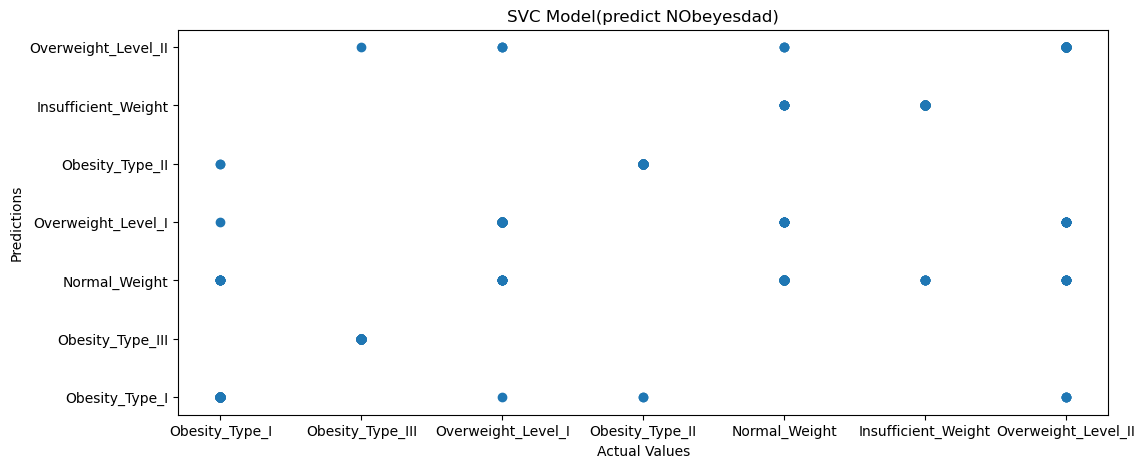

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# convert the predictions to a pandas dataframe
predictions_pd2 = pd.DataFrame({
    'Actual Values': y1_test,
    'Predictions': y2_pred
})

# Set the size of the figure
plt.figure(figsize=(12, 5))

# Plot the predictions versus the actual values
plt.scatter(predictions_pd2['Actual Values'], predictions_pd2['Predictions'])
plt.title('SVC Model(predict NObeyesdad)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

*The scatter plot illustrates the predictions made by the SVC model against actual classes, indicating a degree of misalignment, particularly noticeable between categories like 'Obesity_Type_I' and 'Obesity_Type_II', suggesting room for improvement in the model's classification accuracy.*

#### SVC model performance evaluation

For a svc model, because it is often used to classify tasks, Accuracy, F1 Score, Precision, and Recall are appropriate metrics to evaluate.

In [39]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y1_test is your test labels and prediction1 is the predictions made by your model

# Calculate F1 score
svc_f1 = f1_score(y1_test, y2_pred, average='weighted')
print("svc_F1 Score:", svc_f1)

# Calculate Accuracy
svc_accuracy = accuracy_score(y1_test, y2_pred)
print("svc_Accuracy:", svc_accuracy)

# Calculate Precision
svc_precision = precision_score(y1_test, y2_pred, average='weighted')
print("svc_Precision:", svc_precision)

# Calculate Recall
svc_recall = recall_score(y1_test, y2_pred, average='weighted')
print("svc_Recall:", svc_recall)

svc_F1 Score: 0.8690861763034476
svc_Accuracy: 0.8675078864353313
svc_Precision: 0.8754573635871552
svc_Recall: 0.8675078864353313


In [40]:
from sklearn.metrics import classification_report

# create evaluate report
svc_actual = predictions_pd2['Actual Values']
svc_predicted = predictions_pd2['Predictions']
svc_report = classification_report(svc_actual, svc_predicted)
print(svc_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.92      0.91        77
      Normal_Weight       0.66      0.74      0.70        88
     Obesity_Type_I       0.93      0.88      0.90       101
    Obesity_Type_II       0.98      0.98      0.98        90
   Obesity_Type_III       1.00      0.99      0.99        95
 Overweight_Level_I       0.74      0.84      0.78        87
Overweight_Level_II       0.91      0.73      0.81        96

           accuracy                           0.87       634
          macro avg       0.87      0.87      0.87       634
       weighted avg       0.88      0.87      0.87       634



#### SVC Model Performance Observation

1. The SVC model excels at identifying **Insufficient_Weight** with a high F1 score of 0.92.
2. There's a notable need for improvement in the **Normal_Weight** classification, as evidenced by the lowest F1 score of 0.70.
3. The model is highly competent at distinguishing **Obesity_Type_I** and **II**, with F1 scores of 0.90 and 0.98, respectively.
4. With a perfect precision and an F1 score of 1.00 and 0.99, the model's predictions for **Obesity_Type_III** are exceptionally accurate.
5. **Overweight_Level_I** and **II** see moderate model effectiveness, indicated by F1 scores of 0.78 and 0.81.

**Overall, the SVC model's accuracy is solid with an average score of 0.87 across all categories.**

### *Multi-Layer Perceptron model: test score and evaluation*

In [41]:
MLP_C_test_score = model_classification.evaluate(x1_test, y1_test_categorical, batch_size=32, verbose=0)[1]  # 1 for accuracy, 0 for loss
print("MLP Model Test Score to predict NObeyesdad:", MLP_C_test_score)

MLP Model Test Score to predict NObeyesdad: 0.9274448156356812


In [42]:
# Making predictions
y3_pred = model_classification.predict(x1_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


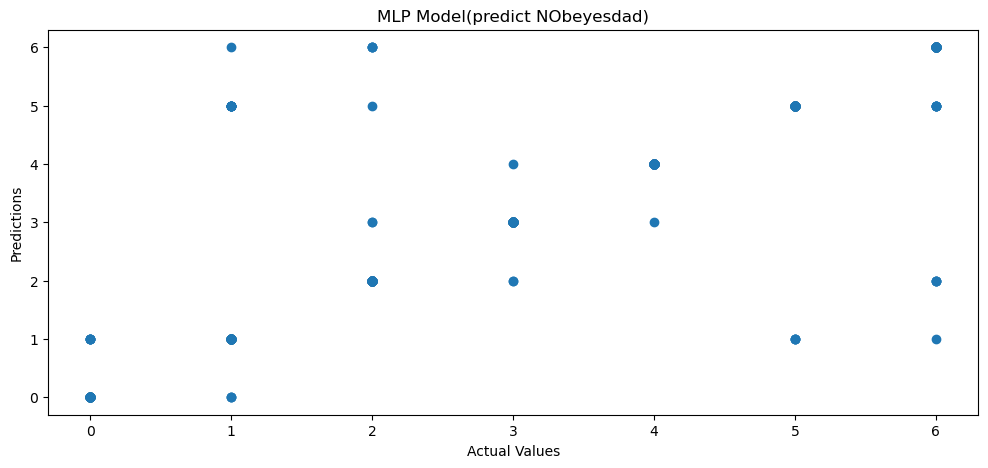

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y1_test is your test labels and y3_pred is the predictions made by model
label_encoder = LabelEncoder()

y1_test_encoded = label_encoder.fit_transform(y1_test)
y3_pred_labels = np.argmax(y3_pred, axis=1)
    
# convert the predictions to a pandas dataframe
predictions_pd3 = pd.DataFrame({
    'Actual Values': y1_test_encoded,
    'Predictions': y3_pred_labels
})

# Set the size of the figure
plt.figure(figsize=(12, 5))

# Plot the predictions versus the actual values
plt.scatter(predictions_pd3['Actual Values'], predictions_pd3['Predictions'])
plt.title('MLP Model(predict NObeyesdad)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()


*The scatter plot shows the predictions from an MLP model, with a discernible discrepancy between the predicted and actual values, especially at higher data points.  Despite the high performance scores as below, the visual analysis from the scatter plot reveals specific areas where the model does not perform optimally.* 

#### MLP model performance evaluation

In [44]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate F1 score
mlp_f1 = f1_score(y1_test_encoded, y3_pred_labels, average='weighted')
print("MLP_F1 Score:", mlp_f1)

# Calculate Accuracy
mlp_accuracy = accuracy_score(y1_test_encoded, y3_pred_labels)
print("MLP_Accuracy:", mlp_accuracy)

# Calculate Precision
mlp_precision = precision_score(y1_test_encoded, y3_pred_labels, average='weighted')
print("MLP_Precision:", mlp_precision)

# Calculate Recall
mlp_recall = recall_score(y1_test_encoded, y3_pred_labels, average='weighted')
print("MLP_Recall:", mlp_recall)

MLP_F1 Score: 0.9276551683283709
MLP_Accuracy: 0.9274447949526814
MLP_Precision: 0.9295060090708634
MLP_Recall: 0.9274447949526814


In [45]:
from sklearn.metrics import classification_report

# create evaluate report
mlp_actual = predictions_pd3['Actual Values']
mlp_predicted = predictions_pd3['Predictions']
mlp_report = classification_report(mlp_actual, mlp_predicted)
print(mlp_report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        77
           1       0.87      0.84      0.86        88
           2       0.94      0.93      0.94       101
           3       0.97      0.97      0.97        90
           4       0.99      0.99      0.99        95
           5       0.83      0.95      0.89        87
           6       0.94      0.89      0.91        96

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



#### MLP Model Performance Observation

1. The MLP model demonstrates outstanding precision, recall and F1 score in classifying categories 4(**Obesity_Type_III**), with all scores of 0.99.
2. There is a relative weakness in the model's performance for category 5, with a lower recall of 0.83, despite a good F1 score of 0.89.
3. The classifications for categories 0(**Insufficient_Weight**), 2(**Obesity_Type_I**), and 6(**Overweight_Level_II**) show high effectiveness, with F1 scores of 0.94, 0.94, and 0.91 respectively.
4. Category 5(**Overweight_Level_I**), while still well-predicted, has slightly less precision at 0.83, leading to an F1 score of 0.89.
5. The model excels with nearly perfect scores in category 3(**Obesity_Type_II**), demonstrating a high capability to distinguish this specific class.

**Overall, the MLP model exhibits excellent performance with an 0.93 across all categories.**

### Regression Models  (predict BMI)

### *Linear Regression Model: test score and evaluation*

R² and RMSE are suitable evaluation values for linear regression model. R² quantifies how well a model captures the observed variability, while RMSE offers a directly interpretable assessment of the average error in the model's predictions.

In [46]:
# Making predictions
y4_pred = linear_model.predict(x2_test)

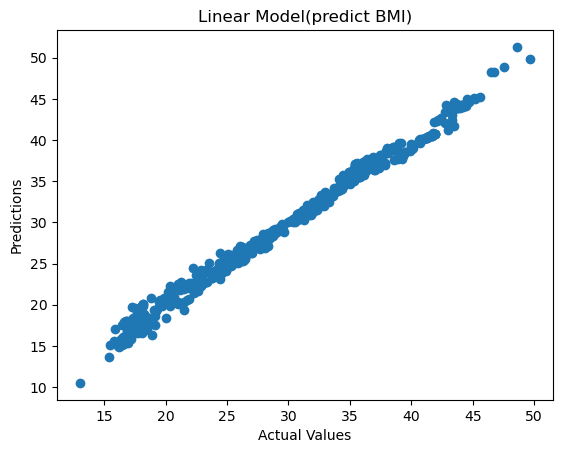

Linear_R² score: 0.9917768760837358
Linear_RMSE is:  0.5148809129284537


In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# convert the predictions to a pandas dataframe
predictions_pd4 = pd.DataFrame({
    'Actual Values': y2_test,
    'Predictions': y4_pred
})

# Plot the predictions versus the actual values
plt.scatter(predictions_pd4['Actual Values'], predictions_pd4['Predictions'])
plt.title('Linear Model(predict BMI)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()


# Calculating R² score
Linear_r2 = r2_score(y2_test, y4_pred)

print(f"Linear_R² score: {Linear_r2}")


from sklearn.metrics import mean_squared_error

Linear_RMSE = mean_squared_error(y2_test, y4_pred)
print ('Linear_RMSE is: ', Linear_RMSE)

#### Linear Model Performance Observation
The scatter plot suggests a strong **positive correlation** between predicted and actual values with an R² of 0.99177, indicating an excellent model fit, while the RMSE of 0.51488 reflects a relatively **small prediction error**.

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Initialize the Linear Regression model
lm = LinearRegression()

# Fit the Linear Regression model on your training data
lm.fit(x2_train, y2_train)

# Perform Recursive Feature Elimination (RFE) with 20 features to select
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(x2_train, y2_train)

# Get the columns that were selected by RFE
selected_columns = x2_train.columns[rfe.support_]

# Create a new training data set with the selected features
x2_train_selected = x2_train[selected_columns]

# Add a constant to the model (statsmodels does not include it by default)
x2_train_selected = sm.add_constant(x2_train_selected)

# Create an OLS model with the selected features
ols_model = sm.OLS(y2_train, x2_train_selected)

# Fit the OLS model
ols_result = ols_model.fit()

# Display the summary of the OLS model
summary = ols_result.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     9898.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:00:49   Log-Likelihood:                -1708.6
No. Observations:                1477   AIC:                             3451.
Df Residuals:                    1460   BIC:                             3541.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Observation and Interpretation based on the Linear Regression model results

Dietary Factors:
1. FAVC has a coefficient of 0.1036, indicating a positive association between higher consumption frequency and higher BMI. It is recommended to reduce intake of high-calorie/sugary/fatty foods.

2. FCVC has a coefficient of 8.6980, which is unusual. This may be due to individuals with higher BMI consuming more vegetables in efforts to control weight. However, moderate vegetable intake is beneficial for BMI control.
  
3. NCP has a coefficient of 0.2572, suggesting that excessive main meal frequency may lead to energy surplus and increased BMI. Controlling main meal frequency may aid in weight loss.
  
4. CAEC has a negative coefficient of -0.0426, indicating that reducing additional meals between main meals is beneficial for BMI control.
  
5. CH2O has a positive coefficient of 0.0745, suggesting that individuals with higher weight may require more water intake. Adequate water intake is beneficial for health.
  
6. CALC has a positive coefficient of 0.0367, indicating that excessive alcohol consumption may lead to increased BMI. Reducing alcohol intake may aid in weight loss.

Physical Condition Factors:
1. SCC has a negative coefficient of -0.0573, indicating that regular monitoring of calorie intake helps with BMI control, reflecting good self-management practices.
  
2. FAF has a negative coefficient of -0.0608, highlighting the importance of exercise in reducing BMI. Increasing exercise intensity and duration is crucial for weight loss.
  
3. TUE has a positive coefficient of 0.0057, suggesting that sedentary behavior using electronic devices may increase BMI. Reducing sedentary time and engaging in more activities are beneficial for health.
  
4. MTRANS has a negative coefficient of -0.0301, indicating that choosing active transportation modes like walking or cycling helps increase daily physical activity and control BMI.

### *Multi-Layer Perceptron model: test score and evaluation*

In [49]:
# Making predictions
y5_pred = model_regression.predict(x2_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


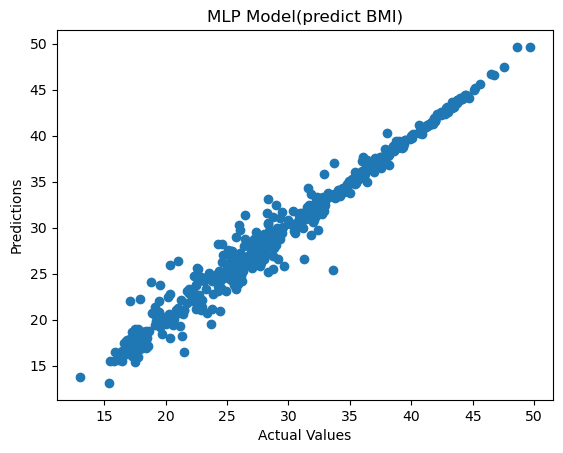

MLP_R²: 0.9765998855658499
MLP_RMSE: 1.2104419582018593


In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# y5_pred might not be 1-dimensional
y5_pred_flat = np.ravel(y5_pred)  # Flatten y5_pred

# convert the predictions to a pandas dataframe
predictions_pd5 = pd.DataFrame({
    'Actual Values': y2_test,
    'Predictions': y5_pred_flat
})

# Plot the predictions versus the actual values
plt.scatter(predictions_pd5['Actual Values'], predictions_pd5['Predictions'])
plt.title('MLP Model(predict BMI)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

# calculate RMSE
mse = mean_squared_error(y2_test, y5_pred)
MLP_rmse = np.sqrt(mse)

# calculate R²
MLP_r2 = r2_score(y2_test, y5_pred)

print("MLP_R²:", MLP_r2)
print("MLP_RMSE:", MLP_rmse)

#### MLP Model Performance Observation

The scatter plot shows a  **strong positive correlation** between the predicted and actual values with an R² of 0.98254. The RMSE of 1.0456 that higher than linear regression model due to the reason maybe MLPs can be sensitive to outliers in the data.

## 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

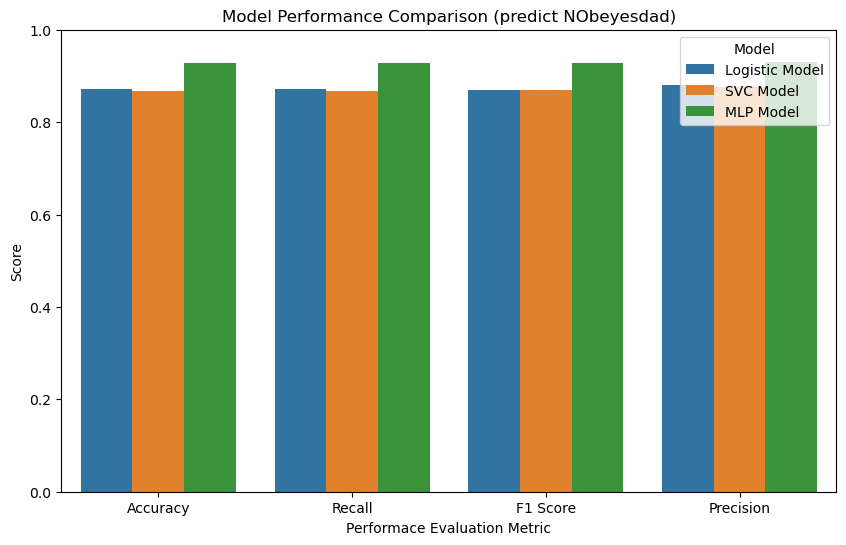

In [51]:
# Prepare the data for plotting
data = {
    'Metric': ['Accuracy', 'Recall', 'F1 Score', 'Precision']*3,
    'Value': [
        Lgr_accuracy, Lgr_recall, Lgr_f1, Lgr_precision, 
        svc_accuracy, svc_recall, svc_f1, svc_precision,
        mlp_accuracy, mlp_recall, mlp_f1, mlp_precision
    ], 
    'Model': ['Logistic Model']*4 + ['SVC Model']*4 + ['MLP Model']*4
}


df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df)
plt.title('Model Performance Comparison (predict NObeyesdad)')
plt.ylabel('Score')
plt.xlabel('Performace Evaluation Metric')
plt.ylim(0, 1) 
plt.show()

Based on the above graph, it is noted that both models perform fairly well to predict NObeyesdad.

To be more specific, the MLP model outperforming the Logistic and SVC models in accuracy and recall, while the SVC model leads slightly in precision and F1 score, closely followed by the Logistic model. 

Overall, the MLP model excels in predicting NObeyesdad with the highest accuracy and recall.

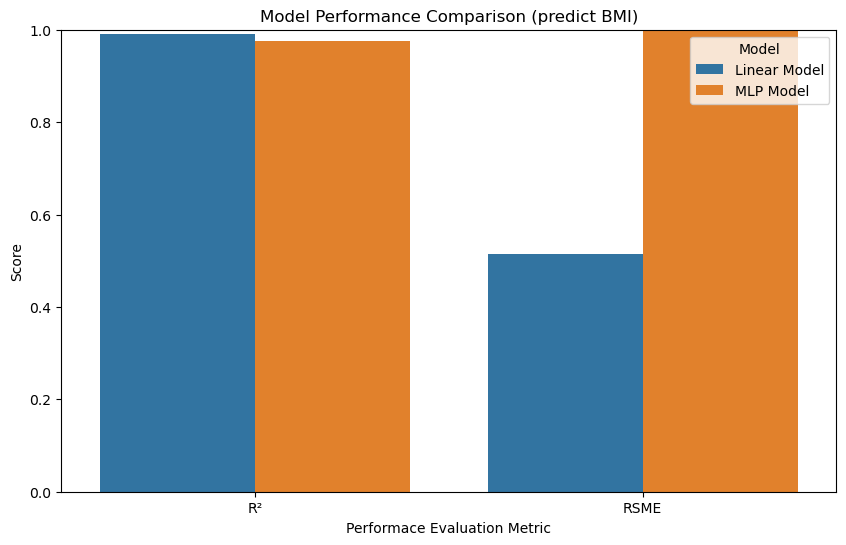

In [52]:
# Prepare the data for plotting
data = {
    'Metric': ['R²', 'RSME']*2,
    'Value': [
        Linear_r2, Linear_RMSE, 
        MLP_r2, MLP_rmse
    ], 
    'Model': ['Linear Model']*2 + ['MLP Model']*2
}


df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df)
plt.title('Model Performance Comparison (predict BMI)')
plt.ylabel('Score')
plt.xlabel('Performace Evaluation Metric')
plt.ylim(0, 1) 
plt.show()

Based on the graph, we observe that both models—the Linear Model and the MLP Model—have strong performance metrics for predicting BMI.

To be specific:

1. **R² Score**: The Linear Model has an R² score slightly lower than the MLP Model, which suggests the MLP Model explains a bit more variability of the data around the mean. 

2. **RMSE**: The MLP Model exhibits a higher RMSE value than the Linear Model, which indicates a higher average deviation from the actual data points. 

To sum up, the MLP Model performs slightly better in terms of R², suggesting a stronger fit to the data. However, the Linear Model has a lower RMSE, indicating more accurate predictions on average.

**In conclusion, The MLP model demonstrates a higher R² value compared to the Linear Model, suggesting it captures the underlying data structure more effectively, despite a higher RMSE indicating larger average prediction errors.  Additionally, its superior F1 score and accuracy in classification tasks reveal its strength in modeling complex patterns compared to logistic and SVC models.**

**However, when we want to dig the deeper insights of model, OLS regression results from Linear Regrassion Model is easier to build and benefit us to use to make observation and interpretation.**

**Therefore, in this case, I think we could choose both MLP and Linear Regreassion as a suitable model to predict and analysis.**

## 8. Describe appropriate recommendations

Based on above observations, governments or similar agencies can issue the following health recommendations to address obesity:

1. **Improve dietary habits**: Limit intake of high-calorie foods and encourage regular consumption of vegetables, especially for those with a family history of obesity, as avoiding high-calorie foods and eating vegetables regularly correlates with lower BMI.

2. **Special focus on the elderly**: Given the relationship between age and obesity, with older adults tending towards moderate obesity, implement health and nutrition guidance programs specifically for the elderly.

3. **Promote healthy drinking habits**: Educate those who frequently drink alcohol（CALC) and have a higher BMI on healthy drinking, emphasizing the importance of moderation.

4. **Encourage physical activity**: Motivate the public to engage in moderate to moderate-intensity physical activities, such as walking or cycling, to control or reduce BMI, as those who walk or cycle generally have a lower BMI showd in MATRN.

## 9. Reflect on what you have learned by completing this assignment

This assignment has deepened my understanding of how to use Python's ‘matplotlib’ and ‘seaborn’ libraries for data visualization. It enhanced my grasp of data visualization techniques and data handling capabilities by teaching me how to organize data and understand the differences between various scaling methods. Furthermore, this process provided me with insights into the distinctions between different models and their applicability to various data scenarios.

## 10. References

#### Lib references:
1. sklearn
2. numpy
3. pandas
4. matplotlib
5. seaborn as sns
6. statsmodels
7. sklearn

#### File references:
1. Linear Regression model & visualization & performance evaluation methods: Workshop1.ipynb 
2. OLS Regression Results & Data standard scale methods: House-price-prediction-ridge-lasso-regression Solutions.ipynb
3. Encoding & Normalizing & SVC Model & Logistic Regression methods: Income_Evalutation-1.ipynb
4. Train/Test spliting & MLP model medthods: Workshop Week 4 Solutions.ipynb